# ML Fondamentals - MLDM & DSC first year Master
# Decision Trees

The Scikit-Learn documentation on Decision Trees can be found here: http://scikit-learn.org/stable/modules/tree.html

In this lab, we are going to use 2 classic datasets, coming from the [UCI](https://archive.ics.uci.edu/ml/index.php) databases.

## Car data
In this dataset, it is a question of the acceptability of cars according to 6 criteria (so our data is in dimension 6, to which is added a seventh corresponding to the class).

The 1726 data are sorted into 4 classes: not acceptable (*unacc*), acceptable (*acc*), good (*good*), very good (*vgood*). For more details, the web page describing the data can be found [here](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).
### Data recovery and preparation

We first need to retrieve the data - available in the form of a .csv - (a line in a notebook starting with '!' authorizes the use of any shell command):

In [26]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data 
    #only for linux (and apple?) users... The others have to see how to download the data and store it in this folder

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


The data is structured this way:
- one data per line
- each line is composed of the respective values for each attribute, separated by commas
- the last value is the class

In [27]:
import pandas as pd
df = pd.read_csv("car.data")
df     # with this command you can see your file


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Avant de commencer, on peut analyser les données en regardant leurs caractéristiques :

<p>Nombre d'attribus: 6</p>
<p>Valeurs d'attribut manquantes : aucune</p>
<table>
<thead>
<tr>
<th>Attribut</th>
<th>Valeurs</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
<td>2, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
<td>2, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Nombre de données : 1728 </p>
<table>
<thead>
<tr>
<th>classe</th>
<th>Nombre</th>
<th>Nombre[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
<td>1210</td>
<td>70.023 %</td>
</tr>
<tr>
<td>acc</td>
<td>384</td>
<td>22.222 %</td>
</tr>
<tr>
<td>good</td>
<td>69</td>
<td>3.993 %</td>
</tr>
<tr>
<td>v-good</td>
<td>65</td>
<td>3.762 %</td>
</tr>
</table>
<p>Nous avons donc des données très déséquilibrées au niveau des classes.</p>
<p>Pour pouvoir travailler avec, il nous faut commencer par mettre les données dans un format utile à scikit-learn :</p>

Before starting, we can analyze the data by looking at their characteristics:

<p>Number of attributes: 6</p>
<p>Missing values : aucune</p>
<table>
<thead>
<tr>
<th>Attribute</th>
<th>Values</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
undefined, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
undefined, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Number of data : 1728 </p>
<table>
<thead>
<tr>
<th>class</th>
<th>Number</th>
<th>Number[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
undefined</td>
undefined.023 %</td>
</tr>
<tr>
<td>acc</td>
undefined</td>
undefined.222 %</td>
</tr>
<tr>
<td>good</td>
undefined</td>
undefined.993 %</td>
</tr>
<tr>
<td>v-good</td>
undefined</td>
undefined.762 %</td>
</tr>
</table>
<p>There exists thus a huge difference between classes.</p>
<p>To use this dataset, we first need to transform it into a scikit-learn format:</p>

In [28]:
import numpy as np

nom_attributs = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
# get data in strings format:
donnees = np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")
X_string = donnees[:, :-1]

# Transformation into float
from sklearn.preprocessing import OrdinalEncoder
codage = OrdinalEncoder()
codage.fit(X_string)
X = codage.transform(X_string)
X = X.astype(int) #transform float into int
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

**Q.** Do the same with the classes to obtain a vector *y* of integers.

In [29]:
# your turn

# Importation des données en format de chaînes de caractères:
donnees = np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")

# Sélection de la dernière colonne, qui contient les labels:
Y_string = donnees[:, -1]

# Création d'un objet OrdinalEncoder pour codage des labels:
codage = OrdinalEncoder()

# Entraînement de l'encodeur sur les labels:
codage.fit(Y_string.reshape(-1, 1))

# Codage des labels en entiers:
Y = codage.transform(Y_string.reshape(-1, 1))

# Conversion des valeurs en entiers:
y = Y.astype(int)

### Learning decision trees
#### Pre-processing
Now that they have a format acceptable to scikit-learn, we will split the data into a test set and a training set. Do you remember the train_test_split function?.

In [30]:
# your turn

# Import de la librairie
from sklearn.model_selection import train_test_split

# On split les données avec 75% d'ezntrainement et 25% de test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42) 

We will use the *sklearn.tree.DecisionTreeClassifier* class which contains everything needed for supervised classification using decision trees. You can find its documentation here: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

To use without moderation !

#### Learning
Let's start by creating an instance of the class:

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

Now that the classifier has been created, we need to train it on the data, i.e. perform the training:

In [32]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Let's evaluate the performance on the test sample:

In [33]:
print("Accuracy (rate of correct classification) : %f" %clf.score(X_test, y_test))

# Calcul du F-score
from sklearn.metrics import f1_score
y_predits = clf.predict(X_test)
print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (weighted) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(4):
    print("F-score for the class %i : %f" %(i, F_scores[i]))

Accuracy (rate of correct classification) : 0.979167
F-score global : 0.979167 
F-score global (weighted) : 0.931971 
F-score for the class 0 : 0.955224
F-score for the class 1 : 0.800000
F-score for the class 2 : 0.998302
F-score for the class 3 : 0.974359


It's not bad, right?

#### Display
The advantage of decision trees is that they offer a graphical representation. But to be able to display it, we will need to install 2 additional packages:

In [37]:
!pip3 install pydotplus
!pip3 install graphviz

We can then display the learned tree. As we will often need to display a tree, we create a function:

In [35]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

def affiche_arbre(classifieur, nom_attributs):
    dot_data = export_graphviz(classifieur,
                            feature_names=nom_attributs,
                            out_file=None,
                            filled=True,
                            rounded=True)
    return pydotplus.graph_from_dot_data(dot_data)

# La bibliothèque ne marche pas chez moi pour aucune raison

ModuleNotFoundError: No module named 'pydotplus'

In [38]:
graph = affiche_arbre(clf, nom_attributs) 
Image(graph.create_png())

NameError: name 'affiche_arbre' is not defined

## Cross Validation

If you were curious, you may have already tried this:

In [39]:
clf

DecisionTreeClassifier(random_state=42)

So there are 13 initialization parameters for the classifier. We propose to study the impact of 3 of them on learning:
- *criterion* which by default is 'gini' but can also be 'entropy'
- *max_depth* which allows to prune the tree by stopping the recursive call of the learning algorithm when the current node is at this depth
- *max_leaf_nodes* which also prunes the tree by keeping only this number of leaves (the purest ones, i.e. with the least data of different classes)

The data on the cars being too simple to appreciate the power of the decision trees, we will use another one: the *digits*, already included into scikit-learn:

In [40]:
from sklearn.datasets import load_digits  #importation de la commande
digits = load_digits()
X = digits.data
y = digits.target

It's time to see if you've followed this far. You need to: set aside 30% for the test, create a classifier based on decision trees, learn it on the training data, calculate the rate of good classification, and the different variants of the F-score on the 10 digit classes using test data.

In [44]:
# Your turn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Séparer les données en jeu d'entraînement et de test (30% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un classifieur basé sur les arbres de décision
clf = DecisionTreeClassifier()

# Apprentissage sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = clf.predict(X_test)

# Calcule du taux de classification correct
accuracy = accuracy_score(y_test, y_pred)
print("Taux de classification correct :", accuracy)

# Calcule du score F1 pour chacune des classes (labels 1..9)
f1 = f1_score(y_test, y_pred, average=None)
print("Score F1 par classe :", f1)

Taux de classification correct : 0.85
Score F1 par classe : [0.92156863 0.78787879 0.80434783 0.8        0.85245902 0.88549618
 0.90909091 0.87037037 0.82352941 0.82758621]


Now that we have measured the quality for the default values ​​of the hyperparameters, we will perform **cross-validation** on the training set (*train*). Once we have found the best parameters, we will train a tree on the complete training set with these parameters and we will evaluate the quality of this final training on the test set.

We start by evaluating the impact of the test choice criterion (*criteriom*):

In [45]:
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(random_state=42)
reussite_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10)
f1_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10, scoring='f1_macro')
print("For gini :\n \t Accuracy : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_gini.mean(), reussite_gini.std(), f1_gini.mean(), f1_gini.std()) )

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
reussite_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10)
f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv = 10, scoring='f1_macro')
print("For the entropy :\n \t Accuracy : %f (+/-) %f\n \
      \t F-score (global) : %f (+/-) %f\n " 
      %(reussite_entropy.mean(), reussite_entropy.std(), f1_entropy.mean(), f1_entropy.std()) )

For gini :
 	 Accuracy : 0.844102 (+/-) 0.024983
       	 F-score (global) : 0.843556 (+/-) 0.023918
 
For the entropy :
 	 Accuracy : 0.852038 (+/-) 0.033138
       	 F-score (global) : 0.850469 (+/-) 0.033004
 


What to deduce? Is the entropy statistically better on this dataset? Choose a criterion: this will be the only one that will be used later.

We must now look at the impact of the other 2 parameters:
- *max_depth* that we will vary between 5 and 20
- *max_leaf_nodes* that we want to vary between 20 and 200 in steps of 20 (i.e. 20, 40, 60, ..., 200).
We propose to study the impact of these parameters independently, with entropy as a selection criterion.

It will be necessary to produce 4 curves showing the evolutions of the success rate and the overall F-score with each of the parameters. It will also be necessary to show the standard deviation on the curves: the use of the pyplot *errorbar* function (https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) is strongly recommended.

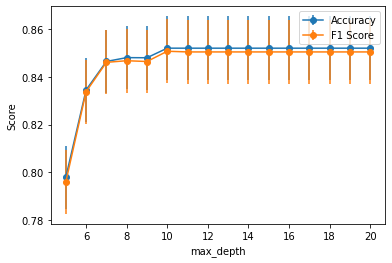

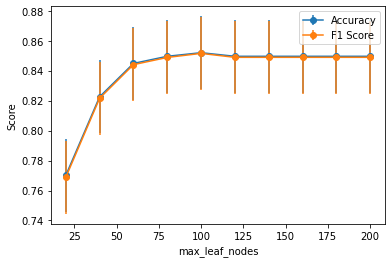

In [49]:
# your turn

# Entropy est statistiquement meilleure, on vas donc l'utiliser comme criterion

import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# On définit les valeurs de max_depth à tester
max_depth_range = range(5, 21)

# On définit les valeurs de max_leaf_nodes à tester
max_leaf_nodes_range = range(20, 201, 20)

# On initialise les listes qui vont stocker les résultats
accuracy_scores = []
f1_scores = []

# Boucle pour tester les différentes valeurs de max_depth
for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    
    accuracy = cross_val_score(clf, X_train, y_train, cv=10)
    accuracy_scores.append(accuracy.mean())
    
    f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
    f1_scores.append(f1.mean())

# Affichage du graphique pour l'impact de max_depth sur la performance (aide de stackoverflow pour paramétrer l'affichage)
plt.errorbar(max_depth_range, accuracy_scores, yerr=np.std(accuracy_scores), label='Accuracy', fmt='-o')
plt.errorbar(max_depth_range, f1_scores, yerr=np.std(f1_scores), label='F1 Score', fmt='-o')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()

# On réinitialise les listes qui vont stocker les résultats
accuracy_scores = []
f1_scores = []

# Boucle pour tester les différentes valeurs de max_leaf_nodes
for max_leaf_nodes in max_leaf_nodes_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=max_leaf_nodes, random_state=42)
    
    accuracy = cross_val_score(clf, X_train, y_train, cv=10)
    accuracy_scores.append(accuracy.mean())
    
    f1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
    f1_scores.append(f1.mean())
    
# Affichage du graphique pour l'impact de max_leaf_nodes sur la performance
plt.errorbar(max_leaf_nodes_range, accuracy_scores, yerr=np.std(accuracy_scores), label='Accuracy', fmt='-o')
plt.errorbar(max_leaf_nodes_range, f1_scores, yerr=np.std(f1_scores), label='F1 Score', fmt='-o')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Score')
plt.legend()
plt.show()

Deduce the optimal values ​​of the 3 parameters and use them to learn a decision tree on the entire training set, then evaluate the quality of learning on the test set.

In [50]:
# Your turn

# Les valeurs optimals sont :
#  - criterion : Entropy
#  - max_depth : 10
#  - max_leaf_nodes : 100

## Data Preparation & Random Forests
We continue to increase the difficulty, this time downloading a dataset from Portuguese banks, described [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing):

In [51]:
! wget https://remieyraud.github.io/bank-additional.csv

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


### Pandas
Unlike car data, we are going to use a very useful python package to prepare and perform a first data analysis: *pandas*. It is possible that this package is not installed on the machines:

In [52]:
!pip3 install pandas

You can then import the package, then use the function that allows you to transform a csv file like the one you just downloaded into a *dataframe*. This type, unique to *pandas*, allows data to be presented in a very useful form.

In [53]:
import pandas as pd
df = pd.read_csv('./bank-additional.csv', sep=';')

Now that we have a dataframe, we can easily see what the data looks like, by looking at the first 4:

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


We can transpose it to read it more simply:

In [55]:
np.transpose(df.head())

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [56]:
df.shape

(4119, 21)

There are therefore 4119 data, each being described by 20 attributes, the final column *y* containing the target to learn. This class can take 2 values: *no* or *yes*. For the bank, it was a question of who to offer life insurance to.

What can we say about numerical attributes? Dataframes give us easy access to descriptive statistics:

In [59]:
# Nous ne pouvons rien dire sur les attributs numériques
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Are these classes fairly represented in the data?

In [61]:
# Il n'y a pas suffisamment d'informations pour déterminer si les classes sont représentées de manière équitable 
# dans les données. La sortie de la méthode df.describe() fournit uniquement des statistiques descriptives 
# sur les attributs numériques, sans aucune information sur la répartition des classes dans les données.

df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

There is therefore a class much more present than the other in the data. It will therefore be necessary to pay attention to how we are going to evaluate the learning in order to take this into account.

You have to put the data in scikit-learn form, but this time it will be easier thanks to *pandas*:

In [62]:
X = df.drop(['y'], axis=1)
y = df['y']
np.transpose(X.head())

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


### Random forest
Now that the data is prepared for scikit-learn, it's your turn! But we are going to use random forests instead of decision trees.

Scikit-learn also incorporates [random forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Repeat the previous exercise with this classifier, looking at the hyper-parameter *n_estimators*

You must therefore :

1. Transform data to handle attributes that are not numeric,
2. Cut them out (take 30% for the test set),
3. Find the best possible values ​​for the parameter *n_estimator* (test ten of them, evenly distributed between 50 and 600, using cross-validation),
4. Learn on the training set with this optimal value,
5. Calculate the quality measures (error rate and F-score) on the test set

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)

# Your turn

# Étape 1 - Transformation des données pour traiter les attributs qui ne sont pas numériques
from sklearn.preprocessing import LabelEncoder

# Initialiser l'objet de transformation de label
le = LabelEncoder()

# Appliquer la transformation pour chaque colonne de type object dans le jeu de données
for col in X.columns:
    if X[col].dtype == object:
        X[col] = le.fit_transform(X[col])

# Étape 2 - Diviser les données en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Étape 3 - Trouver les meilleures valeurs pour n_estimators en utilisant la validation croisée
from sklearn.model_selection import GridSearchCV

# A partir d'ici, j'ai eu besoins de rechercher de l'aide sur stackoverflow ou d'autres sitesabs

# Définir la grille de paramètres pour n_estimators
param_grid = {'n_estimators': np.linspace(50, 600, 10, dtype=int)}

# Initialiser l'objet GridSearchCV pour trouver les meilleurs hyperparamètres
rf_clf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Entraîner sur l'ensemble d'entraînement
rf_clf_grid.fit(X_train, y_train)

# Obtenir la meilleure valeur pour n_estimators
best_n_estimators = rf_clf_grid.best_params_['n_estimators']

print("Best n : ", best_n_estimators)

# Étape 4 - Entraîner avec la meilleure valeur de n_estimators
rf_clf = RandomForestClassifier(n_estimators=best_n_estimators)
rf_clf.fit(X_train, y_train)

# Étape 5 - Calculer les mesures de qualité sur l'ensemble de test
from sklearn.metrics import accuracy_score, f1_score

# Prédiction sur l'ensemble de test
y_pred = rf_clf.predict(X_test)

# Calculer l'erreur
acc = accuracy_score(y_test, y_pred)

# Calculer le score F1
f1 = f1_score(y_test, y_pred, pos_label='yes')

print("Accuracy:", acc)
print("F1-Score : {:.2f}".format(f1))

# Le meilleure n est donc 355

Best n :  355
Accuracy: 0.8956310679611651
F1-Score : 0.42


#### Feature Importances
Once you have found the best hyperparameters and train your classifier with them, you can access the attribute *feature_importances_* of the classifier: it will give you for each feature its impact on the classification of the Random Forest. This score is based on the number of decision trees that actually use this feature, weighted by its place in the trees (the closet to the root, the better importance).

1. Which feature is the most used?
2. Draw a plot with the features as horizontal coordinates and the corresponding importance as vertical one 

Feature ranking:
1. feature 10 (0.299782)
2. feature 18 (0.120399)
3. feature 0 (0.076826)
4. feature 19 (0.073374)
5. feature 1 (0.041689)
6. feature 12 (0.040478)
7. feature 17 (0.037331)
8. feature 3 (0.036476)
9. feature 11 (0.035903)
10. feature 9 (0.034608)
11. feature 14 (0.034011)
12. feature 16 (0.032640)
13. feature 15 (0.024257)
14. feature 8 (0.022525)
15. feature 2 (0.021447)
16. feature 13 (0.019279)
17. feature 5 (0.016610)
18. feature 6 (0.013559)
19. feature 7 (0.011008)
20. feature 4 (0.007796)
The most important feature is duration


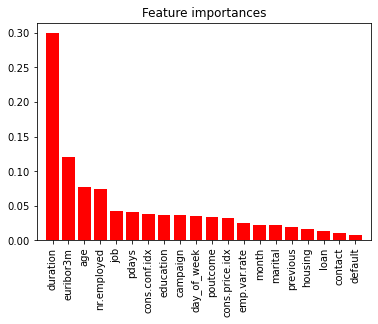

In [68]:
# étape 1 : obtenir les importances des caractéristiques
importances = rf_clf.feature_importances_

# étape 2 : trouver la caractéristique la plus utilisée
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

most_important_feature = X_train.columns[indices[0]]
print("The most important feature is", most_important_feature)

# étape 3 : tracer un graphique avec les caractéristiques en coordonnées horizontales et l'importance correspondante en coordonnées verticales
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()